<a href="https://colab.research.google.com/github/cloudspace63/python/blob/main/Zadatak_tabele.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import pandas modula:

In [1]:
import pandas as pd

Import numpy i pyplot biblioteke:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Uvoz .csv fajla o proizvodnji i tipu elektrana na svetskom nivou:

In [19]:
from google.colab import files
data=files.upload()

Saving elektrane.csv to elektrane.csv


In [20]:
data=pd.read_csv('elektrane.csv')

In [21]:
data.head(5)

,country code,country_long,name of powerplant,capacity in MW,latitude,longitude,primary_fuel,secondary fuel,other_fuel2,other_fuel3,start date,owner of plant,generation_gwh_2021,geolocation_source,estimated_generation_gwh_2021
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,32.322,65.1190,Hydro,NaN,NaN,NaN,NaN,NaN,NaN,GEODB,123.77
1,AFG,Afghanistan,Kandahar DOG,10.0,31.670,65.7950,Solar,NaN,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,18.43
2,AFG,Afghanistan,Kandahar JOL,10.0,31.623,65.7920,Solar,NaN,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,18.64
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,34.556,69.4787,Hydro,NaN,NaN,NaN,NaN,NaN,NaN,GEODB,225.06
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,34.641,69.7170,Hydro,NaN,NaN,NaN,NaN,NaN,NaN,GEODB,406.16


In [ ]:
pd.isna(data)

Grupisanje elektrana po primarnom energentu:

In [23]:
data.groupby('primary_fuel').count()

,country code,country_long,name of powerplant,capacity in MW,latitude,longitude,secondary fuel,other_fuel2,other_fuel3,start date,owner of plant,generation_gwh_2021,geolocation_source,estimated_generation_gwh_2021
primary_fuel,,,,,,,,,,,,,,
Biomass,1430,1430,1430,1430,1430,1430,136,62,37,582,653,152,1430,0
Coal,2330,2330,2330,2330,2330,2330,421,67,15,1897,2031,282,2330,0
Cogeneration,41,41,41,41,41,41,7,0,0,34,41,33,41,0
Gas,3998,3998,3998,3998,3998,3998,925,76,16,2746,3228,1775,3930,0
Geothermal,189,189,189,189,189,189,3,0,0,143,127,65,189,0
Hydro,7156,7156,7156,7156,7156,7156,4,0,0,3797,3545,1419,6993,7108
Nuclear,195,195,195,195,195,195,5,1,0,98,131,58,184,0
Oil,2320,2320,2320,2320,2320,2320,210,12,2,1603,1450,837,2315,0
Other,43,43,43,43,43,43,11,3,0,28,35,15,43,0


Napravljen je novi DF sa pojedinim kolonama:

In [24]:
data1= data[['primary_fuel', 'capacity in MW', 'generation_gwh_2021' ]]

In [26]:
data1.head(10)

,primary_fuel,capacity in MW,generation_gwh_2021
0,Hydro,33.00,NaN
1,Solar,10.00,NaN
2,Solar,10.00,NaN
3,Hydro,66.00,NaN
4,Hydro,100.00,NaN
5,Hydro,11.55,NaN
6,Gas,42.00,NaN
7,Hydro,6.00,NaN
8,Hydro,22.00,NaN
9,Hydro,27.00,NaN


In [ ]:
data1.groupby('primary_fuel').count()
#Prikazuje ukupan kapacitet u megavatima za odredjene energente

In [ ]:
data1.groupby('primary_fuel').aggregate(['mean','median'])

Filtriram po energentu, npr. solarna energija:

In [ ]:
data[data['primary_fuel']=="Solar"]

Sada premestam kolonu "primary_fuel" da bude na prvoj poziciji .

In [33]:
df = data[[ 'primary_fuel', *data.columns[data.columns != 'primary_fuel']]]


In [ ]:
df

Koliko ima elektrana po zemljama(20 zemalja):

In [43]:
vc=data['country_long'].value_counts().head(20)
print(vc)

country_long
United States of America    9833
China                       4235
United Kingdom              2751
Brazil                      2360
France                      2155
India                       1589
Germany                     1309
Canada                      1159
Spain                        829
Russia                       545
Japan                        522
Australia                    486
Portugal                     469
Czech Republic               462
Italy                        396
Chile                        315
Norway                       306
Mexico                       277
Vietnam                      236
Argentina                    236
Name: count, dtype: int64


FIltriranje po energentu i drzavi:

In [48]:
filter_df = df[(df['primary_fuel'] == 'Solar') & (df['country_long'] == 'United States of America')]

In [49]:
filter_df

,primary_fuel,country code,country_long,name of powerplant,capacity in MW,latitude,longitude,secondary fuel,other_fuel2,other_fuel3,start date,owner of plant,generation_gwh_2021,geolocation_source,estimated_generation_gwh_2021
24710,Solar,USA,United States of America,100 Brook Hill Drive Solar,2.0,41.0930,-73.9828,NaN,NaN,NaN,2016.0,Diamond Properties,2.467,U.S. Energy Information Administration,NaN
24711,Solar,USA,United States of America,1025 Traveller Solar LLC,5.0,35.4273,-79.1263,NaN,NaN,NaN,2019.0,CI-II Mitchell Holding LLC,1.332,U.S. Energy Information Administration,NaN
24712,Solar,USA,United States of America,1047 Little Mountain Solar LLC,3.0,36.1971,-80.8067,NaN,NaN,NaN,2019.0,CI-II Mitchell Holding LLC,1.417,U.S. Energy Information Administration,NaN
24713,Solar,USA,United States of America,12 Applegate Solar LLC,1.9,40.2003,-74.5761,NaN,NaN,NaN,2012.0,G&S Solar Installers LLC,2.349,U.S. Energy Information Administration,2.92
24714,Solar,USA,United States of America,126 Grove Solar LLC,2.0,42.0761,-71.4227,NaN,NaN,NaN,2012.0,126 Grove Solar LLC,2.303,U.S. Energy Information Administration,3.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34519,Solar,USA,United States of America,York Road Solar I LLC,2.0,35.2222,-81.3337,NaN,NaN,NaN,2015.0,SRE Utility Solar 1 LLC,3.597,U.S. Energy Information Administration,NaN
34528,Solar,USA,United States of America,ZV Solar 1,5.0,34.8000,-79.2000,NaN,NaN,NaN,2016.0,Cypress Creek Renewables,9.791,U.S. Energy Information Administration,NaN
34529,Solar,USA,United States of America,ZV Solar 2 LLC,4.9,34.8160,-79.2000,NaN,NaN,NaN,2017.0,CD Global Solar Holdings LLC,9.575,U.S. Energy Information Administration,NaN
34530,Solar,USA,United States of America,ZV Solar 3 LLC,5.0,34.8162,-79.2002,NaN,NaN,NaN,2016.0,SRE Utility Solar 1 LLC,9.364,U.S. Energy Information Administration,NaN


In [56]:
filter2 = data[data['country_long'] == 'France']

In [57]:
filter2

,country code,country_long,name of powerplant,capacity in MW,latitude,longitude,primary_fuel,secondary fuel,other_fuel2,other_fuel3,start date,owner of plant,generation_gwh_2021,geolocation_source,estimated_generation_gwh_2021
10290,FRA,France,ARRIGHI,254.00000,48.7872,2.4033,Oil,NaN,NaN,NaN,NaN,NaN,NaN,CARMA,NaN
10291,FRA,France,ASTON,104.00000,42.7770,1.6770,Hydro,NaN,NaN,NaN,NaN,NaN,NaN,GEODB,295.74
10292,FRA,France,AVIGNON,126.00000,43.9760,4.8170,Hydro,NaN,NaN,NaN,NaN,NaN,NaN,GEODB,546.92
10293,FRA,France,Ablaincourt-Pressoir,14.35000,49.8414,2.8247,Wind,NaN,NaN,NaN,NaN,NaN,NaN,Open Power System Data,NaN
10294,FRA,France,Ablainzevelle,10.00000,50.1529,2.7410,Wind,NaN,NaN,NaN,NaN,NaN,NaN,Open Power System Data,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12440,FRA,France,Étalante,20.00000,47.6291,4.7664,Wind,NaN,NaN,NaN,NaN,NaN,NaN,Open Power System Data,NaN
12441,FRA,France,Étampes,2.12600,48.4218,2.1378,Biomass,NaN,NaN,NaN,NaN,NaN,NaN,Open Power System Data,NaN
12442,FRA,France,Éteignières,1.48000,49.8907,4.4031,Biomass,NaN,NaN,NaN,NaN,NaN,NaN,Open Power System Data,NaN
12443,FRA,France,Étréville,1.06300,49.3800,0.6558,Biomass,NaN,NaN,NaN,NaN,NaN,NaN,Open Power System Data,NaN


In [58]:
df2=filter2['primary_fuel'].value_counts()

Text(0.5, 1.0, 'Francuska - Broj elektrana po energentima')

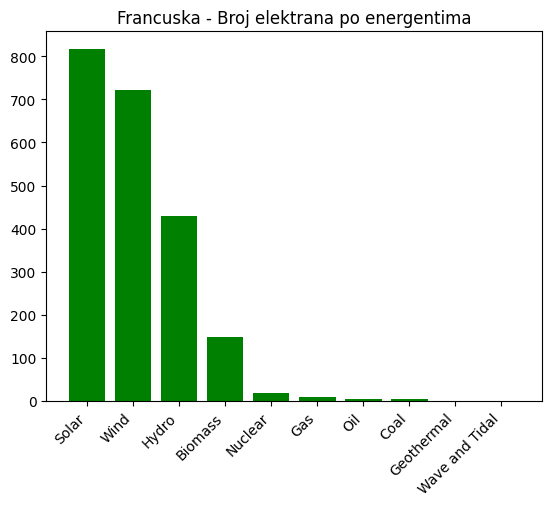

In [68]:
plt.bar(df2.index, df2.values,color='green')
plt.xticks(rotation=45, ha='right')
plt.title('Francuska - Broj elektrana po energentima')

In [81]:
df3=filter2.groupby('primary_fuel').sum()

Text(0.5, 1.0, 'Francuska - kapacitet po energentima [MW]')

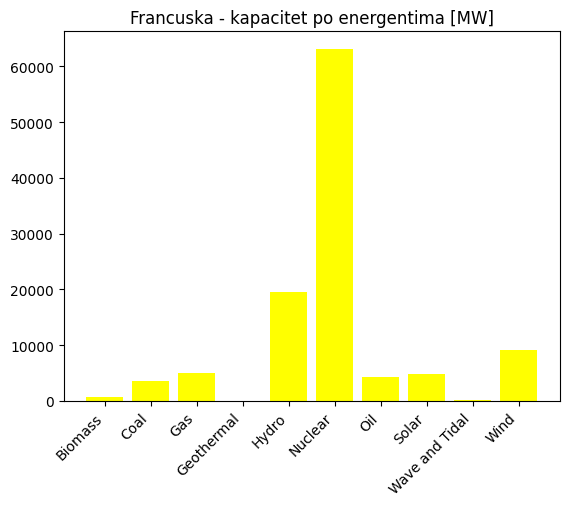

In [94]:
plt.bar(df3.index, df3['capacity in MW'],color='yellow')
plt.xticks(rotation=45, ha='right')
plt.title('Francuska - kapacitet po energentima [MW]')